In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
folder_name = 'Training results/'
file_names = ['VGG_augm-results.txt', 'DenseNet_augm-results.txt','WRN28_augm-results.txt','WRN40_augm-results.txt']
names = ['VGG16', 'DenseNet-121', 'WRN-28-10', 'WRN-40-10']

I = 1
J = 4
train_color = '#ff8800'
test_color = '#2200ff'

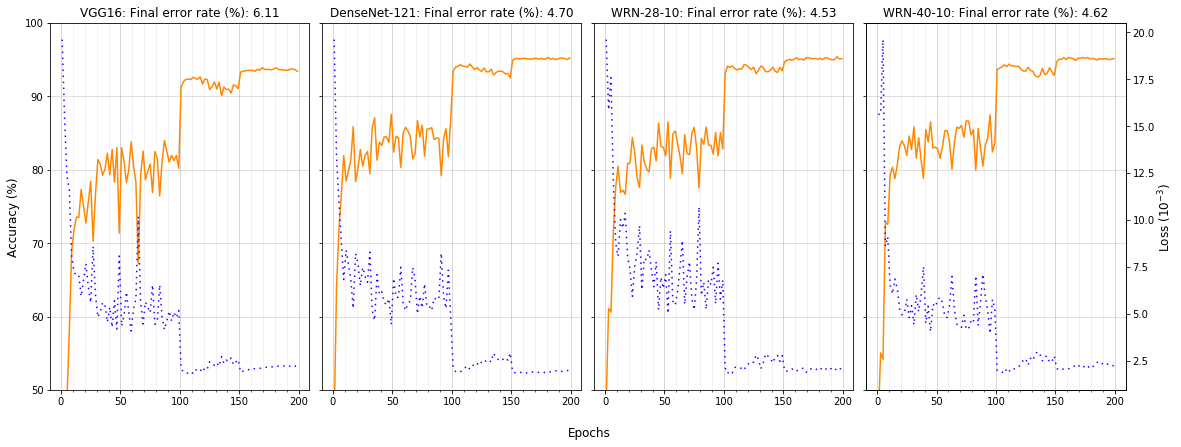

In [3]:
fig, ax = plt.subplots(I, J, sharey=True, figsize=(16,6))

# Data format: epoch accuracy testloss trainloss 
for i, f in enumerate(file_names): 
    data = np.loadtxt(folder_name+f, skiprows=1)
    epochs = data[:,0]
    acc = data[:,1]
    testloss = data[:,2]*1000
    
    major_ticks = np.arange(0, 101, 20)
    minor_ticks = np.arange(0, 101, 5)

    ax[i].set_yticks(np.arange(0, 101, 10))
    ax[i].set_yticks(np.arange(0, 101, 100), minor=True)
    ax[i].set_xticks(np.arange(0, 301, 50))
    ax[i].set_xticks(np.arange(0, 301, 10), minor=True)
    ax[i].set_ylim(50,100)
    ax[i].grid(which='both')
    ax[i].grid(which='minor', alpha=0.2)
    ax[i].grid(which='major', alpha=0.5)
    
    ax[i].plot(epochs[::2], acc[::2], color=train_color)
    
    ax[i].set_title(names[i]+ ": Final error rate (%): {:.2f}".format(100-np.max(acc)))
    
    ax0c = ax[i].twinx()
    
    ax0c.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    if i < 3:
        ax0c.axis('off')
    # ax0c.plot(epochs, trainloss, ls=':', color=train_color, dashes=(1, 3))
    ax0c.plot(epochs[::2], testloss[::2], ls=':', color=test_color, dashes=(1, 3))


eps = fig.text(0.5, 0.0, 'Epochs', ha='center', va='center', fontsize=12)
accs = fig.text(0.0, 0.5, 'Accuracy (%)', ha='center', va='center', rotation='vertical', fontsize=12)
lss = fig.text(1, 0.5, r'Loss ($10^{-3}$)', ha='center', va='center', rotation='vertical', fontsize=12)
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.95, wspace=0.05, hspace=0.25)
plt.savefig('training_results.pdf', format='pdf', dpi=500, bbox_extra_artists=(eps,accs,lss), bbox_inches='tight')